In [26]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [27]:
# gather all features we have downloaded thus far - make sure they all have zipcode data
prison = pd.read_pickle('data/prison_binary.pkl').drop('state', 1).rename(columns = {'zip': 'zipcode'})
jail = pd.read_pickle('data/jail_binary.pkl').rename(columns = {'zip': 'zipcode'})
demographics = pd.read_pickle('data/cleaned_demographic_features.pkl').drop(['GEO.id', 'GEO.display-label'], 1)
demographics = demographics.rename(columns = {'GEO.id2': 'zipcode'})
bus_patterns = pd.read_pickle('data/business_patterns.pkl').drop('Geographic area name', 1)
bus_patterns = bus_patterns.rename(columns = {'Number of establishments':'n_establishments'})
income = pd.read_pickle('data/medianIncome.pkl')

In [28]:
prison.head(3)

,zipcode,prison
0,35034,1
1,36089,1
2,35023,1


In [29]:
jail.head(3)

,zipcode,jail
0,36067,1
1,36507,1
2,36016,1


In [30]:
demographics.head(3)

,zipcode,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056
1,00601,18570,12.8,16.2,13.9,11.7,13.3,13.1,10.2,5.7,3.1,48.9,6.6,8.5,6.9,5.4,6.3,6.3,4.9,2.7,1.3,51.1,6.3,7.7,7,6.3,6.9,6.8,5.3,2.9,1.8,93.1,3.1,0.4,0,0,99.5,77.8,5.1,2.6,20.3,9.6,20.3,10.2,3.3,10.1,5.5,39.5,29,84.3,15.7,2.9,0.5,2.84,3.27,7744,2.87
2,00602,41520,11.5,15.2,13.5,12.9,14.6,14,10.1,5.7,2.3,49.1,5.9,7.7,6.7,6.4,7,6.8,4.9,2.6,1.1,50.9,5.6,7.5,6.8,6.5,7.6,7.2,5.2,3.1,1.3,86.7,5.3,0.3,0.1,0,99.4,77.6,5.1,2.1,17.4,8,20.5,10.5,3,10,4.9,37.6,25.9,83,17,2.6,1.3,2.76,3.20,18073,2.62
3,00603,54689,12.2,14.2,13,13,12.7,12.6,12,7,3.3,48.6,6.4,7.3,6.5,6.4,6,5.8,5.6,3.2,1.4,51.4,5.8,7,6.5,6.6,6.6,6.7,6.4,3.7,2.1,82.9,7.6,0.3,0.2,0,98.5,71.1,4.7,1.7,22,10.9,26.4,12.7,4.1,13.8,6.8,34,31.1,82.5,17.5,3.6,1.5,2.53,3.06,25653,2.51


In [31]:
bus_patterns.head(3)

,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,zipcode
1,448,9185,70693,314508,01001
2,570,15633,82069,351589,01002
3,16,168,1297,5761,01003


In [32]:
income.head(3)

,zipcode,median_income
0,00601,13318
1,00602,14947
2,00603,14437


In [33]:
jail.shape, prison.shape, demographics.shape, bus_patterns.shape, income.shape

((2870, 2), (975, 2), (33120, 57), (31255, 5), (33120, 2))

In [34]:
# merge all features into single data frame
all_features = demographics.merge(bus_patterns, how='inner', on='zipcode').fillna(0)
all_features = all_features.merge(prison, how='left', on='zipcode').fillna(0)
all_features = all_features.merge(jail, how='left', on='zipcode').fillna(0)
all_features = all_features.merge(income, how='left', on='zipcode').fillna(0)

In [35]:
all_features.shape

(27653, 64)

In [36]:
zipCodeStrings = all_features.zipcode
all_features = all_features.astype('float')

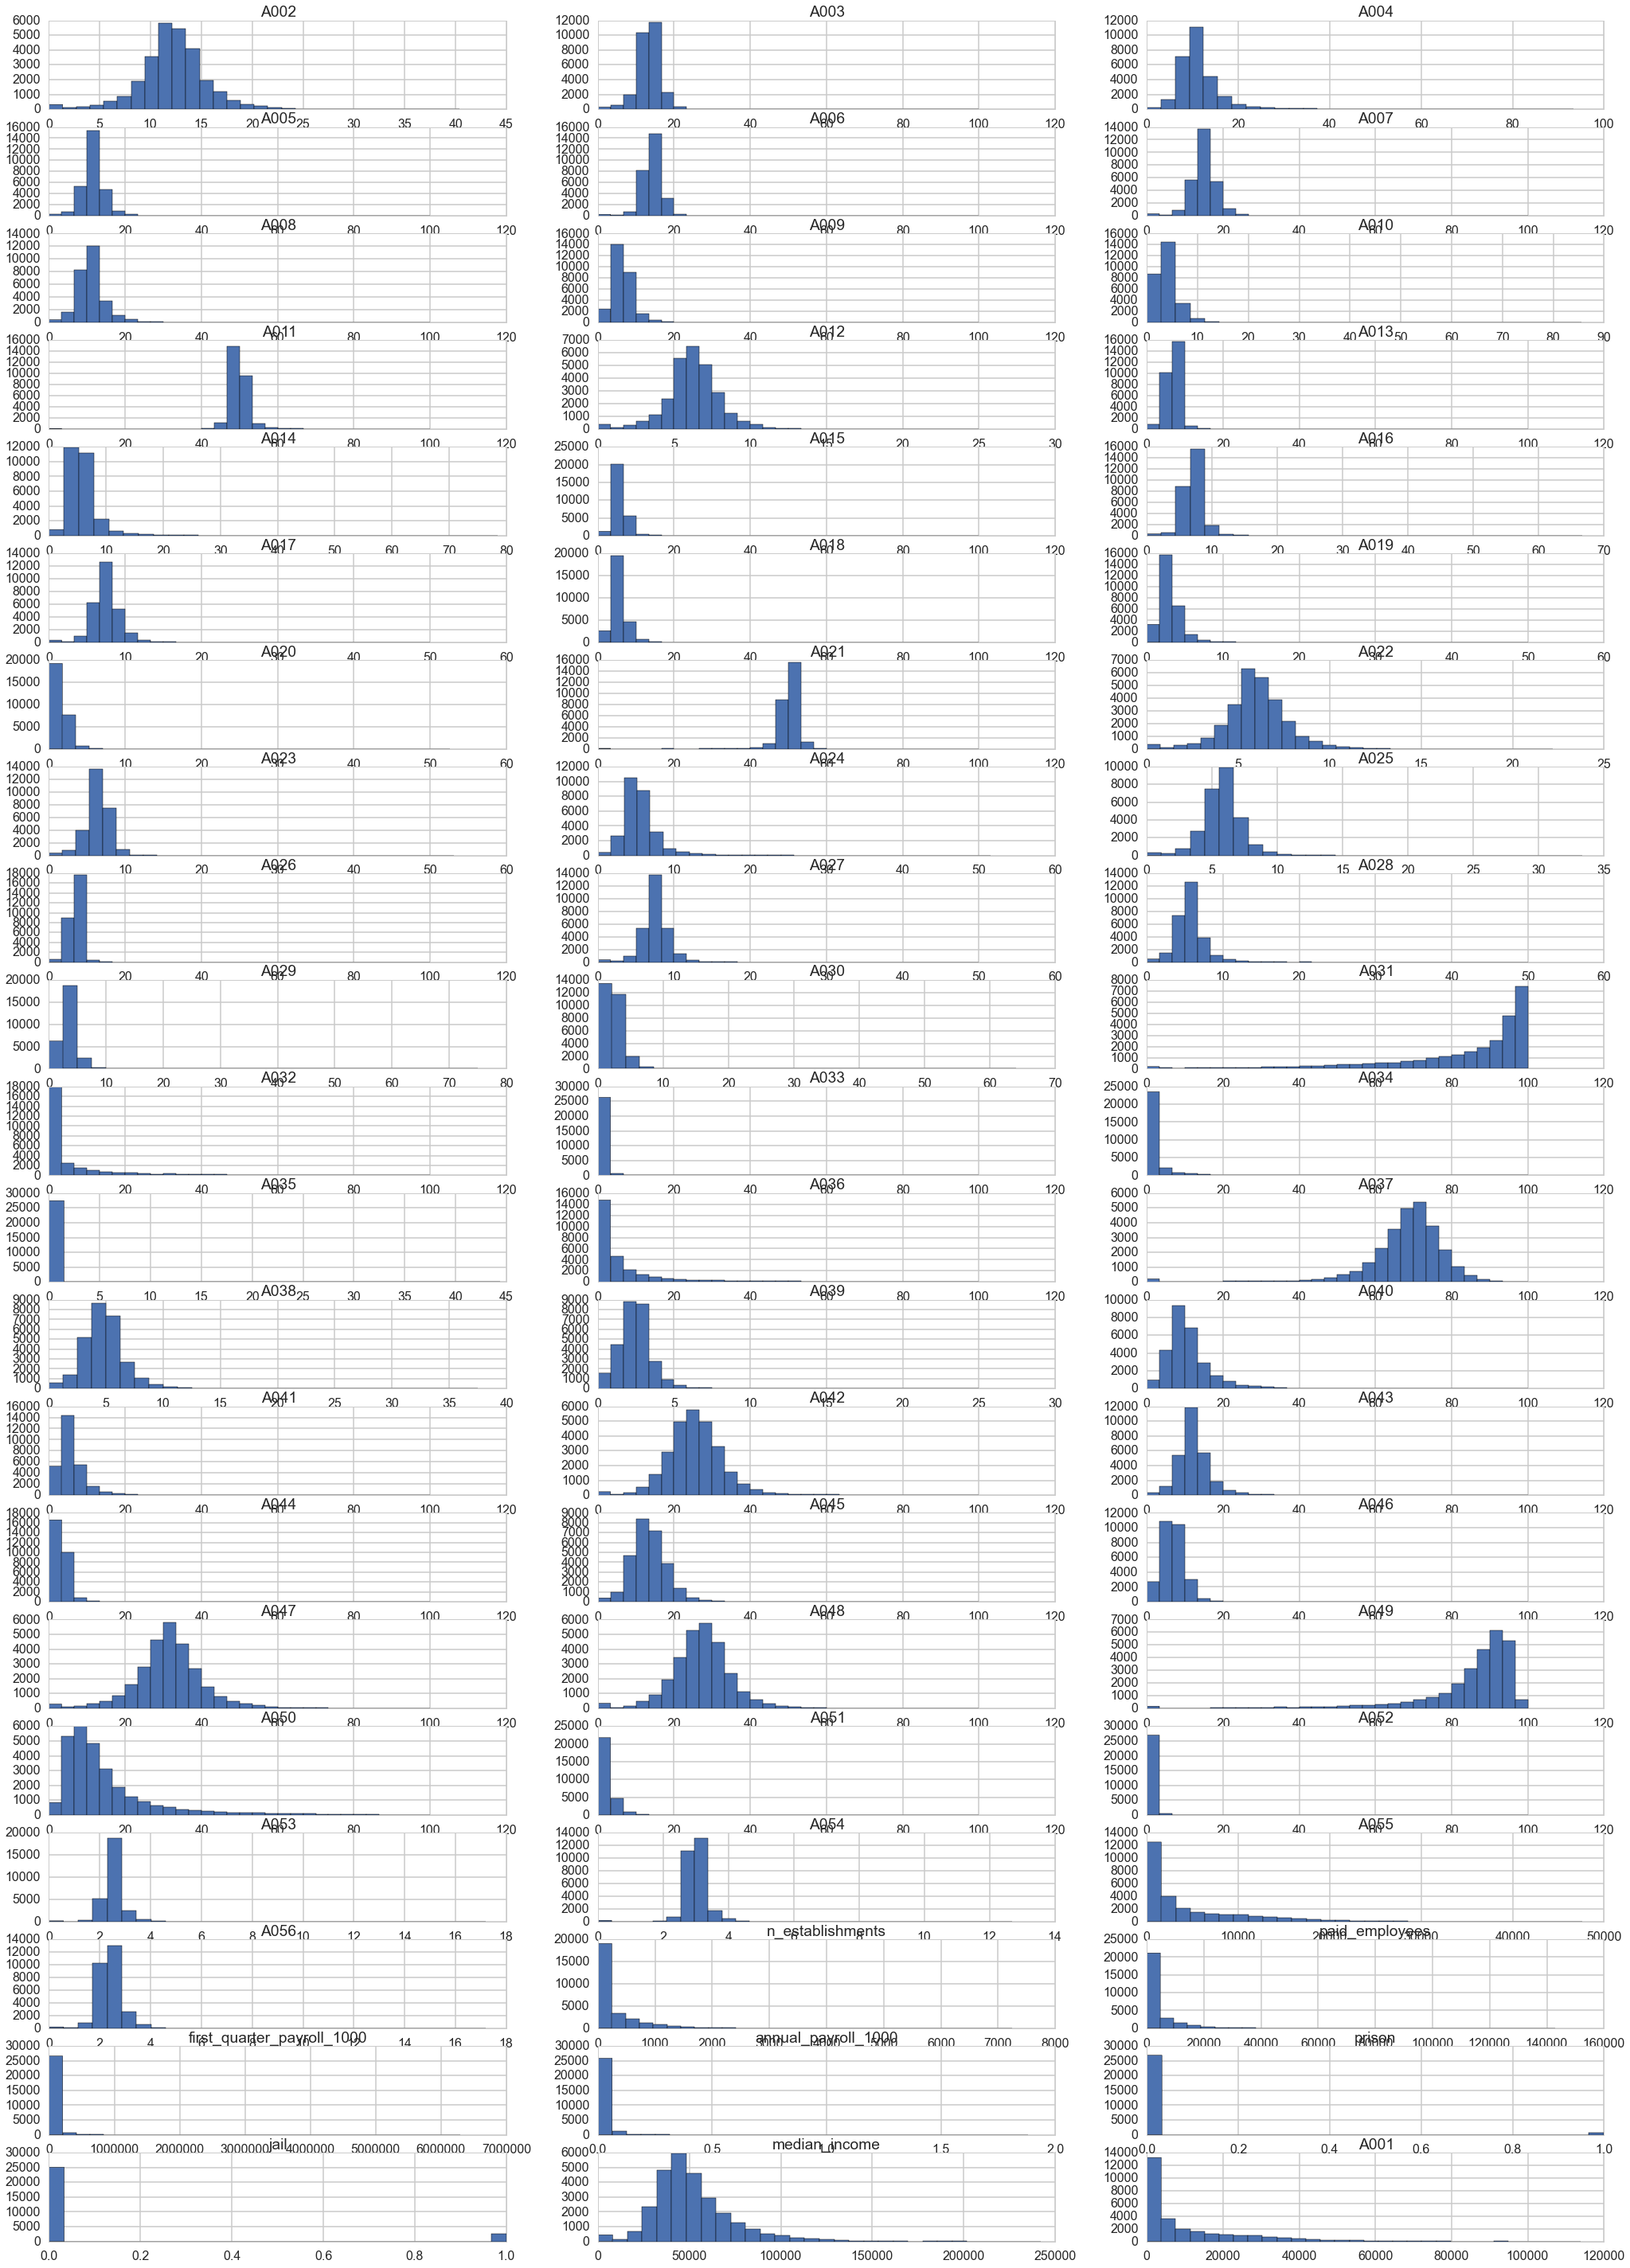

In [61]:
features = all_features.columns[1:]
if len(features)%3 == 0 :
    nROW = len(features)/3
else :
    nROW = np.ceil(len(features)/3.).astype(int)
nCOL = 3

f, ax = plt.subplots(nrows=nROW, ncols=nCOL, figsize=(35,50))

for i in xrange(len(features)):
    plt.subplot(nROW,nCOL,i)
    ax = all_features[features[i]].hist(bins = 30)
    ax.set_title(features[i])

In [62]:
all_features.shape

(27653, 64)

In [63]:
all_features.head(3).values.T.shape

(64, 3)

In [41]:
from sklearn.preprocessing import StandardScaler

all_features_normalized = StandardScaler().fit_transform(all_features.drop('zipcode',1))

In [42]:
all_features_normalized.shape, all_features.shape

((27653, 63), (27653, 64))

In [43]:
all_features.head(3)

,zipcode,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,prison,jail,median_income
0,1001,16769,9.3,11.1,10.7,11.3,14.4,14.9,11.8,7.3,9.0,46.8,4.8,5.5,5.3,5.8,7.0,7.3,5.4,3.0,2.8,53.2,4.6,5.5,5.5,5.5,7.5,7.7,6.4,4.4,6.2,93.6,1.8,0.2,2.1,0,3.3,57.9,4.2,1.9,9.8,4.8,35.1,13.7,4.1,21.3,11.4,24.6,32.2,95.5,4.5,2.1,0.7,2.23,2.91,7557,1.83,448,9185,70693,314508,0,0,59453
1,1002,29049,6.7,17.8,33.8,7.4,8.4,10.7,7.7,4.1,3.4,48.0,3.5,8.1,17.6,3.6,3.8,4.8,3.5,1.8,1.1,52.0,3.3,9.6,16.2,3.8,4.6,5.9,4.2,2.3,2.2,77.8,5.0,0.3,10.2,0,7.9,49.8,2.7,1.3,10.1,6.4,26.8,10.8,2.3,16.0,7.2,23.7,22.1,95.4,4.6,1.8,0.7,2.44,2.87,10388,2.39,570,15633,82069,351589,0,0,54395
2,1003,10372,0.0,45.7,53.8,0.3,0.0,0.1,0.0,0.0,0.0,51.3,0.0,22.1,28.9,0.2,0.0,0.1,0.0,0.0,0.0,48.7,0.0,23.5,25.0,0.1,0.0,0.0,0.0,0.0,0.0,76.9,6.1,0.1,11.5,0,5.1,40.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,20.0,0.0,100.0,0.0,0.0,0.0,3.20,3.50,5,3.20,16,168,1297,5761,0,0,0


In [44]:
all_features.columns[1:]

Index([u'A001', u'A002', u'A003', u'A004', u'A005', u'A006', u'A007', u'A008', u'A009', u'A010', u'A011', u'A012', u'A013', u'A014', u'A015', u'A016', u'A017', u'A018', u'A019', u'A020', u'A021', u'A022', u'A023', u'A024', u'A025', u'A026', u'A027', u'A028', u'A029', u'A030', u'A031', u'A032', u'A033', u'A034', u'A035', u'A036', u'A037', u'A038', u'A039', u'A040', u'A041', u'A042', u'A043', u'A044', u'A045', u'A046', u'A047', u'A048', u'A049', u'A050', u'A051', u'A052', u'A053', u'A054',
       u'A055', u'A056', u'n_establishments', u'paid_employees', u'first_quarter_payroll_1000', u'annual_payroll_1000', u'prison', u'jail', u'median_income'],
      dtype='object')

In [45]:
all_features_normalized = pd.DataFrame(all_features_normalized, columns = all_features.columns[1:])
all_features_normalized['zipcode'] = zipCodeStrings
all_features_normalized.head(3)

,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,prison,jail,median_income,zipcode
0,0.403822,-0.839925,-0.577200,-0.168204,-0.114910,0.097627,-0.022710,0.164482,0.297415,1.855374,-0.654254,-0.783044,-0.641046,-0.195054,-0.049217,-0.050336,-0.098035,-0.050738,-0.022365,1.082934,0.719438,-0.767238,-0.457822,-0.048472,-0.167051,0.288460,0.114242,0.384865,0.639734,2.118527,0.535081,-0.394929,-0.177156,-0.011208,-0.13138,-0.366799,-0.888653,-0.313466,-0.455594,-0.169235,-0.295995,1.116199,0.259922,0.434214,1.593216,1.397376,-0.743050,0.584263,0.759381,-0.798737,-0.134993,-0.549322,-0.651977,-0.223378,0.495932,-1.124265,0.463735,0.737979,0.231006,0.318245,-0.172158,-0.323992,0.332304,01001
1,1.261860,-1.594272,1.084305,3.638466,-1.346952,-2.015987,-1.228271,-0.871073,-0.804575,-0.223704,-0.396719,-1.489846,0.510741,2.836251,-1.107246,-1.880773,-1.383069,-0.897923,-0.802669,-0.377333,0.461899,-1.503218,1.457233,3.958870,-1.254782,-1.507307,-0.860163,-0.722090,-0.705649,-0.149133,-0.228580,-0.192467,-0.162902,1.520559,-0.13138,-0.062326,-1.609325,-1.104775,-0.981585,-0.116915,0.173738,0.114255,-0.327087,-0.496995,0.519232,0.092856,-0.839470,-0.632176,0.752600,-0.791203,-0.255063,-0.549322,-0.163923,-0.324466,0.984798,-0.027929,0.766968,1.620780,0.316380,0.397244,-0.172158,-0.323992,0.109920,01002
2,-0.043154,-3.538166,8.003111,6.934284,-3.589901,-4.975048,-4.270877,-2.815896,-2.216499,-1.486001,0.311503,-3.392777,6.712670,5.621108,-2.742381,-4.054417,-3.798934,-2.458525,-1.973126,-1.322211,-0.246334,-3.371474,7.949734,7.254629,-3.622197,-4.355765,-4.054045,-2.835367,-2.179163,-1.396346,-0.272079,-0.122871,-0.191410,1.766398,-0.13138,-0.247657,-2.481250,-2.529132,-2.121233,-1.878365,-1.705193,-0.706614,1.535146,-1.686872,-2.722984,-2.143463,-1.235864,-3.293888,1.064512,-1.137736,-0.975481,-1.112115,1.602369,1.267669,-0.808171,1.557843,-0.610010,-0.496545,-0.289793,-0.339523,-0.172158,-0.323992,-2.281652,01003


In [46]:
all_features_normalized.to_pickle('data/all_features_norm_not_transformed.pkl')